In [1]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics 
from sklearn.metrics import f1_score

In [2]:
#Reading the Dataset
dataset = pd.read_csv ('data.csv')

In [3]:
#Shape of the Dataset
dataset.shape

(569, 33)

In [4]:
#Column names in the Dataset
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
#Columns information
dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#First 5 rows
dataset.head ()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
#REMOVING UNNEEDED FEATURES¶
#The columns id and Unnamed: 32 don't play any role in the prediction and hence we can drop them from the dataset.
dataset.drop ('id', axis = 1, inplace = True)
dataset.drop ('Unnamed: 32', axis = 1, inplace = True)

In [8]:
#Shape of the dataset
dataset.shape 

(569, 31)

In [9]:
#First 5 rows
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
#CHECKING FOR MISSING DATA
#Next we need to check for any missing data that might be present in the dataset. For this, we will be using the isna () function of the Pandas library
dataset.isna ()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Since all the entries of the isna () function are false, we can conclude that there is no missing data in the dataset.

In [11]:
#CHECKING THE NUMBER OF UNIQUE VALUES
#Next we will be checking how many unique values does each feature have, in order to get a much better understanding of the dataset we are working on.
dict = {}
for i in list(dataset.columns):
    dict[i] = dataset[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


From the result of the above function we can see that we have only 1 categorical data feature and the rest are continuous data features.

ENCODING THE CATEGORICAL VARIABLE
To ensure that the entire dataset is of a continuous numerical form, we will be encoding the categorial variable DIAGNOSIS and converting into a numerical form, preferably into 0s and 1s.

For this, we will be making use of the LabelEncoder class from the Preprocessing module of the Sklearn library

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
dataset.diagnosis = labelencoder_Y.fit_transform(dataset.diagnosis)
dataset.head (10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


From the above table, it is clearly visible that the DIAGNOSIS feature is taking 0s and 1s as values.

0 --> Benign

1 --> Malignant

SPLITTING DATASET INTO DEPENDENT AND INDEPENDENT VARIABLES
Now finally we will be splitting the updated dataset we have into two parts. The first is a collection of the independent variables and is called the MATRIX OF FEATURES. The other is a collection of the dependent variables and is known as RESPONSE FEATURE.

In [13]:
X = dataset.iloc [:, 1:].values
Y = dataset.iloc [:, 0].values
X.shape

(569, 30)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25, random_state = 1)

In [15]:
X_train.shape

(426, 30)

In [16]:
Y_train.shape

(426,)

In [17]:
X_test.shape

(143, 30)

In [18]:
Y_test.shape

(143,)

For this we'll be using one of the most used feature scaling method there is, STANDARD SCALER. This method assumes your data to be normally distributed within each feature and scales them in such a way that the distribution becomes centred around 0 with a standard deviation of 1.

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()
X_train = sc.fit_transform (X_train)
X_test = sc.transform (X_test)

In [20]:
print (X_train [:5, :])

[[ 0.30575375  2.59521918  0.46246107  0.16827218  0.60422155  2.04417806
   2.09352879  1.16366689  1.18198433  1.28429612 -0.52163603 -0.03835455
  -0.25571081 -0.38216301 -0.77588337  1.24952899  1.41506722  0.66874898
   0.12308074  0.80508841  0.24441187  2.73052064  0.61360382  0.04361489
   0.42657507  3.47782867  4.41644563  1.81549702  2.10164609  3.38609913]
 [ 0.23351721 -0.05334893  0.20573083  0.08631508 -0.47424506 -0.12457556
  -0.36621964 -0.01640861  0.26394984 -0.63317355 -0.42668937 -0.47901876
  -0.34672558 -0.33704942 -0.54691279 -0.25816563 -0.55887941  0.005534
  -0.66616947 -0.36984213 -0.01035708  0.08241715  0.04661672 -0.13397845
  -0.04171878  0.30956727 -0.44003546  0.5143837   0.14721854  0.05182385]
 [ 0.15572401  0.18345881  0.11343692  0.07856238  0.15993389 -0.63952448
  -0.18324755  0.09622333 -0.8163076  -0.52992519  0.21204267  0.02165808
   0.14122792  0.08014965 -0.42190198 -0.78467094 -0.4022654  -0.11734193
  -0.80990285 -0.62764173  0.55535036 

In [21]:
print (X_test [:5, :])

[[ 1.58502337e-01 -1.23049032e+00  2.53691428e-01 -7.21453404e-05
   4.81009638e-01  1.55141337e+00  7.10234684e-01  3.62700248e-01
   1.02713514e+00  1.65894019e+00  4.65809179e-01  4.86327343e-01
   9.03655260e-01  1.62451465e-01  9.57103281e-01  1.47051757e+00
   7.09626219e-01  6.24639667e-01  7.85280914e-01  5.58589606e-01
   3.17700683e-02 -1.16984866e+00  1.91256286e-01 -1.34991341e-01
  -4.62216093e-02  7.01791156e-01  2.54378520e-01 -5.73858182e-02
  -8.68965562e-02  4.88638842e-01]
 [-2.63803596e-01 -1.54509521e-01 -2.39617537e-01 -3.36483918e-01
   1.40147509e+00  3.63673764e-01  4.28545703e-01  6.28921185e-01
   1.18198433e+00  7.31179866e-01 -4.28760938e-01 -5.72124078e-01
  -4.77291260e-01 -3.49648715e-01 -1.58278149e-01 -1.36069442e-01
  -9.48002516e-02  4.96433119e-02 -3.82552731e-01 -7.74338066e-02
  -1.26708259e-01  3.63179927e-01 -1.35629132e-01 -2.19061193e-01
   2.08811767e+00  1.04604055e+00  1.13135222e+00  1.41330744e+00
   1.77388495e+00  2.02105229e+00]
 [-3.2

# Model Building

In [22]:
np.random.seed(0)
import tensorflow as tf

In [23]:
# Initialising the ANN
ann = tf.keras.models.Sequential()

In [24]:
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [25]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [26]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

In [27]:
# Training the ANN on the training set
history=ann.fit(X_train, Y_train, validation_data = (X_test,Y_test),batch_size = 16, epochs = 100, verbose=1)

Epoch 1/100
27/27 [==============================] - 0s 12ms/step - loss: 0.7216 - accuracy: 0.5258 - val_loss: 0.6406 - val_accuracy: 0.6783
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7981 - val_loss: 0.5282 - val_accuracy: 0.8182
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.8873 - val_loss: 0.4561 - val_accuracy: 0.8671
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.3699 - accuracy: 0.9155 - val_loss: 0.3986 - val_accuracy: 0.9091
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.9390 - val_loss: 0.3509 - val_accuracy: 0.9091
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2760 - accuracy: 0.9413 - val_loss: 0.3128 - val_accuracy: 0.9091
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.2428 - accuracy: 0.9437 - val_loss: 0.2826 - val_accuracy: 0.9091
Epoch 8/100


Epoch 59/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9859 - val_loss: 0.1056 - val_accuracy: 0.9580
Epoch 60/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9859 - val_loss: 0.1053 - val_accuracy: 0.9580
Epoch 61/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9859 - val_loss: 0.1052 - val_accuracy: 0.9580
Epoch 62/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9859 - val_loss: 0.1053 - val_accuracy: 0.9580
Epoch 63/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9859 - val_loss: 0.1051 - val_accuracy: 0.9580
Epoch 64/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9859 - val_loss: 0.1048 - val_accuracy: 0.9580
Epoch 65/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9859 - val_loss: 0.1045 - val_accuracy: 0.9580
Epoch 

In [28]:
# Predicting the test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

In [29]:
classification_report = metrics.classification_report(Y_test,y_pred)

In [30]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        88
           1       1.00      0.91      0.95        55

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



In [31]:
# Making the confusion matrix, calculating accuracy_score 
from sklearn.metrics import confusion_matrix, accuracy_score

mylist = []
# confusion matrix
cm = confusion_matrix(Y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_ann = accuracy_score(Y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)

Confusion Matrix
[[88  0]
 [ 5 50]]

Accuracy
0.965034965034965


In [32]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

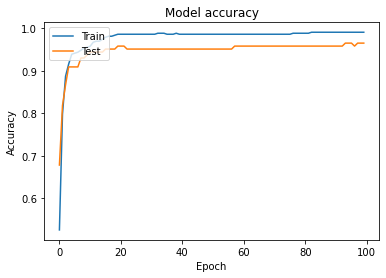

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

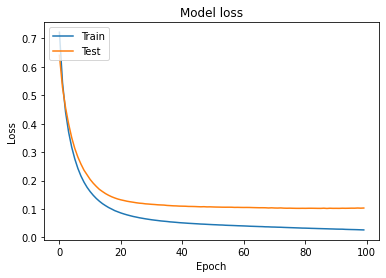

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()